<a href="https://colab.research.google.com/github/snjugunanjenga/google-devs-python-machine-learning/blob/main/MIT_Pre_trained_Transformers_Models_from_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Using pre-trained models to solve "standard" NLP problems **without** fine-tuning

Adapted from https://github.com/nlp-with-transformers/notebooks/blob/main/01_introduction.ipynb

We will use the `transformers` library from HuggingFace (in particular, the `pipeline` function) to demonstrate ready-to-use pretrained models for a variety of standard NLP tasks.

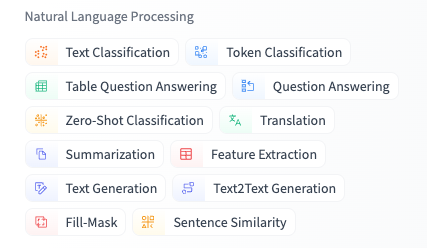

Fortunately, the library is preinstalled in Colab so we can just import it and start using it right away.

We will start with a Text Classification example.

### Text Classification

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [2]:
from transformers import pipeline

In [3]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [4]:
outputs = classifier(text)

In [5]:
outputs

[{'label': 'NEGATIVE', 'score': 0.9015459418296814}]

In [6]:
import pandas as pd
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


Let's try another example.


In [7]:
inputs = ['i hated the movie',
          'if i said i loved the movie, i would be lying',
          'the movie left me speechless',
          ' incredible!',
          'almost but not quite entirely unlike anything good i have ever seen'
          ]

In [8]:
outputs = classifier(inputs)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.999695
1,NEGATIVE,0.992098
2,NEGATIVE,0.991616
3,POSITIVE,0.999877
4,POSITIVE,0.994624


### Named Entity Recognition

In [9]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [10]:
outputs = ner_tagger(text)
pd.DataFrame(outputs)

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question Answering

In [11]:
reader = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [12]:
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


### Summarization

In [13]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [14]:
outputs = summarizer(text, max_length=56, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I


Hmm, that's not great. Let's try another model.

In [15]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [16]:
outputs = summarizer(text, max_length=56, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

Bumblebee ordered an Optimus Prime action figure from Amazon's online store in Germany, but was sent an action figure of Megatron instead. Bumblebee wants an exchange of the Megatron figure for the Optimus Prime figure he ordered. He sent copies of


Much better!

### Text Generation

In [17]:
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results

In [18]:
generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [19]:
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response

In [20]:
prompt

'Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.\n\nCustomer service response:\nDear Bumblebee, I am sorry to hear that your order was mixed up.'

In [21]:
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I was not able to receive the order and had to cancel it immediately. I am not sure if I could help you because I will not be able to send you any items in a timely manner. Thank you.

Order of the Transformers: Operation: The International was delivered to my door. I received my order as soon as I received it. I did not receive the order in time for the shipping.

I am currently waiting for

Yikes!! A bigger model will give us a better response.

You can try the model below later. We will skip it now since it will take a while to download.

In [ ]:
generator = pipeline("text-generation", model='bigscience/bloom')

config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 72 files:   0%|          | 0/72 [00:00<?, ?it/s]

model_00004-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00007-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00003-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00002-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00008-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00001-of-00072.safetensors:   0%|          | 0.00/7.19G [00:00<?, ?B/s]

model_00006-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_00005-of-00072.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

In [ ]:
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])